<a href="https://colab.research.google.com/github/DineshReddy0530/Data-Science/blob/master/internassmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
df=pd.read_csv("Train_Set.csv")

In [0]:
df.shape

(114706, 65)

In [0]:
df.drop_duplicates(keep='first',inplace=True)

In [0]:
df.shape

(93175, 65)

In [0]:
df.head()

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
0,100559.0,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,101026.0,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,101026.0,2018-09-10,0.0,0.0,86.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,18.666667,0.0,3.000000,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,0.0,0.0,0.666667,84.666667,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,101026.0,2018-09-17,0.0,0.0,-0.076046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067797,0.0,-0.250000,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.300000,0.0,0.0,-0.400000,-0.194553,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,101026.0,2018-09-24,0.0,0.0,-0.987654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,-0.5,-0.952381,0.0,-0.666667,-0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.571429,0.0,0.0,0.000000,-0.985507,0.0,0.0,0.0,0.0,0.0,-0.812500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [0]:
df.drop(0,inplace=True)

In [0]:
df_new=df.iloc[:,2:]

In [0]:
X=df_new.iloc[:,:-1].values
y=df_new.iloc[:,-1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [0]:
# When classifier is XGBClassifier
from xgboost import XGBClassifier
classifier= XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("---------------------")
accuracy_score(y_test,y_pred)

[[27730    22]
 [  129    72]]
---------------------


0.9945980753407505

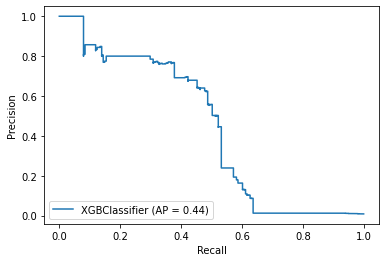

In [0]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)

In [0]:
#For Testing Set
df_testing=pd.read_csv('Test_Set.csv')
X_testing=df_testing.iloc[:,2:-1].values
y_testing=df_testing.iloc[:,-1].values
y_testing_pred=classifier.predict(X_testing)
accuracy_score(y_testing,y_testing_pred)


0.9927076299797434

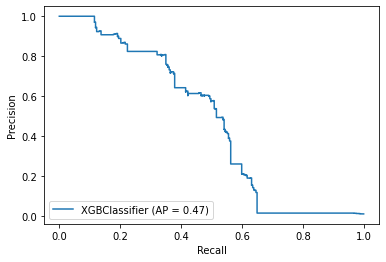

In [0]:
disp = plot_precision_recall_curve(classifier, X_testing, y_testing)

In [0]:
#When classifier is Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("---------------------")
accuracy_score(y_test,y_pred)

[[27735    17]
 [  140    61]]
---------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9943834293278002

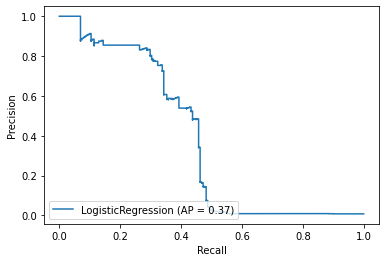

In [0]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)

In [0]:
#For Test Set
y_testing_pred=classifier.predict(X_testing)
accuracy_score(y_testing,y_testing_pred)

0.9925725860904794

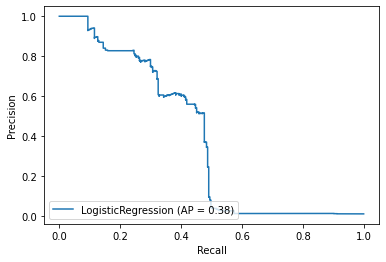

In [0]:
disp = plot_precision_recall_curve(classifier, X_testing, y_testing)